<a href="https://colab.research.google.com/github/Jet1i/ML/blob/main/%E2%80%9CFinancial_Risk_Estimation%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [79]:
!pip install flaml[automl]

In [80]:
# Import the libraries used for machine learning
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt  # used for plotting
import seaborn as sns   # used for plotting
from sklearn.model_selection import train_test_split  #  split the data into training and test
from sklearn.neighbors import KNeighborsClassifier  # import a machine learning model
from sklearn import metrics  # check the error and accuracy of the model

# SEED all random generators
import random
import os
seed = 42
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# read the data
df = pd.read_csv("https://raw.githubusercontent.com/Tianyu-Qu/dataset/refs/heads/main/financial_risk_assessment.csv")

# Data Preprocessing

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    15000 non-null  int64  
 1   Gender                 15000 non-null  object 
 2   Education Level        15000 non-null  object 
 3   Marital Status         15000 non-null  object 
 4   Income                 12750 non-null  float64
 5   Credit Score           12750 non-null  float64
 6   Loan Amount            12750 non-null  float64
 7   Loan Purpose           15000 non-null  object 
 8   Employment Status      15000 non-null  object 
 9   Years at Current Job   15000 non-null  int64  
 10  Payment History        15000 non-null  object 
 11  Debt-to-Income Ratio   15000 non-null  float64
 12  Assets Value           12750 non-null  float64
 13  Number of Dependents   12750 non-null  float64
 14  City                   15000 non-null  object 
 15  St

In [82]:
df.drop(["Age", "Gender", "City", "State", "Country"], axis=1, inplace=True)

In [83]:
# Ordinal Encoding
df['Education Level'] = df['Education Level'].map({"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3})
df['Payment History'] = df['Payment History'].map({"Poor": 0, "Fair": 1, "Good": 2, "Excellent": 3})
df['Risk Rating'] = df['Risk Rating'].map({"Low": 0, "Medium": 1, "High": 2})
# One-Hot Encoding
df = pd.get_dummies(df, columns=['Marital Status', 'Loan Purpose', 'Employment Status'], prefix=['Marital', 'Loan', 'Employment'])
# 检查结果
print(df.head())

# risk_rating_ohe = pd.get_dummies(df['Risk Rating'], prefix='Risk_Rating')
# df = pd.concat([df, risk_rating_ohe], axis=1)
# df.drop('Risk Rating', axis=1, inplace=True)


   Education Level   Income  Credit Score  Loan Amount  Years at Current Job  \
0                3  72799.0         688.0      45713.0                    19   
1                1      NaN         690.0      33835.0                     6   
2                2  55687.0         600.0      36623.0                     8   
3                1  26508.0         622.0      26541.0                     2   
4                1  49427.0         766.0      36528.0                    10   

   Payment History  Debt-to-Income Ratio  Assets Value  Number of Dependents  \
0                0              0.154313      120228.0                   0.0   
1                1              0.148920       55849.0                   0.0   
2                1              0.362398      180700.0                   3.0   
3                3              0.454964      157319.0                   3.0   
4                1              0.143242      287140.0                   NaN   

   Previous Defaults  ...  Marital_Mar

In [84]:
df

,Education Level,Income,Credit Score,Loan Amount,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,...,Marital_Married,Marital_Single,Marital_Widowed,Loan_Auto,Loan_Business,Loan_Home,Loan_Personal,Employment_Employed,Employment_Self-employed,Employment_Unemployed
0,3,72799.0,688.0,45713.0,19,0,0.154313,120228.0,0.0,2.0,...,False,False,False,False,True,False,False,False,False,True
1,1,NaN,690.0,33835.0,6,1,0.148920,55849.0,0.0,3.0,...,False,False,True,True,False,False,False,True,False,False
2,2,55687.0,600.0,36623.0,8,1,0.362398,180700.0,3.0,3.0,...,False,True,False,False,False,True,False,True,False,False
3,1,26508.0,622.0,26541.0,2,3,0.454964,157319.0,3.0,4.0,...,False,True,False,False,False,False,True,False,False,True
4,1,49427.0,766.0,36528.0,10,1,0.143242,287140.0,NaN,3.0,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1,48088.0,609.0,26187.0,2,1,0.317633,NaN,4.0,2.0,...,False,False,True,False,False,True,False,False,True,False
14996,3,107193.0,700.0,35111.0,10,1,0.155126,79102.0,NaN,0.0,...,False,True,False,True,False,False,False,False,True,False
14997,3,46250.0,642.0,44369.0,19,3,0.593999,196930.0,4.0,2.0,...,True,False,False,False,False,True,False,False,False,True
14998,3,40180.0,638.0,32752.0,12,3,0.478035,276060.0,NaN,0.0,...,False,False,False,False,False,True,False,False,True,False


In [85]:
# Pairwise Deletion
critical_columns = ["Income", "Credit Score", "Loan Amount", "Assets Value", "Number of Dependents"]
df = df.dropna(subset=critical_columns)

# Mean Imputation for remaining missing values
for col in df.columns:
    if df[col].isnull().sum() > 0:  # Check if there are missing values
        df[col].fillna(df[col].mean(), inplace=True)

# Check if there are still missing values
print(df.isnull().sum())

Education Level             0
Income                      0
Credit Score                0
Loan Amount                 0
Years at Current Job        0
Payment History             0
Debt-to-Income Ratio        0
Assets Value                0
Number of Dependents        0
Previous Defaults           0
Marital Status Change       0
Risk Rating                 0
Marital_Divorced            0
Marital_Married             0
Marital_Single              0
Marital_Widowed             0
Loan_Auto                   0
Loan_Business               0
Loan_Home                   0
Loan_Personal               0
Employment_Employed         0
Employment_Self-employed    0
Employment_Unemployed       0
dtype: int64


<ipython-input-85-d0a1fd77ca5b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-85-d0a1fd77ca5b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


In [86]:
# Ensure the list of features to bin and the number of bins are defined
features_to_bin = ['Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 'Assets Value']
num_bins = 5  # Define the number of equal-width bins

# Perform equal-width binning for each feature and replace original values
for feature in features_to_bin:
    bin_col_name = f"{feature}_Bin"  # Name for the new binned column
    # Apply equal-width binning
    df[bin_col_name] = pd.cut(df[feature], bins=num_bins, labels=False)  # Equal-width binning
    # Replace original column with binned column
    df[feature] = df[bin_col_name]
    # Drop the intermediate binned column if not needed
    df.drop(columns=[bin_col_name], inplace=True)

# Verify the results
print(df[features_to_bin].head())



    Income  Credit Score  Loan Amount  Years at Current Job  Assets Value
0        2             2            4                     4             1
2        1             0            3                     2             2
3        0             0            2                     0             2
9        0             0            2                     1             1
10       4             2            2                     2             3


<ipython-input-86-628a7c05757e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[bin_col_name] = pd.cut(df[feature], bins=num_bins, labels=False)  # Equal-width binning
<ipython-input-86-628a7c05757e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[bin_col_name]
<ipython-input-86-628a7c05757e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [87]:
df

,Education Level,Income,Credit Score,Loan Amount,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,...,Marital_Married,Marital_Single,Marital_Widowed,Loan_Auto,Loan_Business,Loan_Home,Loan_Personal,Employment_Employed,Employment_Self-employed,Employment_Unemployed
0,3,2,2,4,4,0,0.154313,1,0.0,2.000000,...,False,False,False,False,True,False,False,False,False,True
2,2,1,0,3,2,1,0.362398,2,3.0,3.000000,...,False,True,False,False,False,True,False,True,False,False
3,1,0,0,2,0,3,0.454964,2,3.0,4.000000,...,False,True,False,False,False,False,True,False,False,True
9,1,0,0,2,1,3,0.484333,1,4.0,2.003324,...,True,False,False,False,False,False,True,False,True,False
10,2,4,2,2,2,3,0.114134,3,3.0,0.000000,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,2,4,2,1,2,3,0.560202,3,0.0,1.000000,...,True,False,False,False,False,True,False,False,True,False
14991,1,4,1,3,3,2,0.474802,3,2.0,2.000000,...,True,False,False,False,True,False,False,False,True,False
14993,3,4,1,2,2,3,0.362077,2,2.0,2.003324,...,True,False,False,False,True,False,False,False,True,False
14994,0,1,0,3,2,0,0.399901,0,4.0,1.000000,...,True,False,False,False,False,True,False,False,False,True


# Feature Selection

In [88]:
from scipy.stats import pearsonr
rho = df.corr(method ='pearson')
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.map(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))
rho.round(2).astype(str) + p

,Education Level,Income,Credit Score,Loan Amount,Years at Current Job,Payment History,Debt-to-Income Ratio,Assets Value,Number of Dependents,Previous Defaults,...,Marital_Married,Marital_Single,Marital_Widowed,Loan_Auto,Loan_Business,Loan_Home,Loan_Personal,Employment_Employed,Employment_Self-employed,Employment_Unemployed
Education Level,1.0***,0.03**,0.02*,-0.0,-0.0,0.01,-0.02*,-0.0,-0.0,-0.01,...,0.01,-0.01,-0.0,-0.02,0.0,0.01,0.01,0.01,-0.0,-0.0
Income,0.03**,1.0***,0.01,-0.01,0.0,-0.02*,0.01,-0.0,0.01,-0.02,...,-0.02**,-0.0,0.01,-0.01,-0.01,0.0,0.01,-0.02,0.03***,-0.01
Credit Score,0.02*,0.01,1.0***,-0.01,-0.01,0.01,-0.0,0.01,0.0,-0.01,...,-0.0,-0.01,0.01,0.01,-0.02*,0.01,0.0,-0.01,-0.01,0.02
Loan Amount,-0.0,-0.01,-0.01,1.0***,0.0,-0.0,0.03**,0.0,-0.01,-0.0,...,0.02,-0.01,0.02,0.03**,-0.03**,-0.01,0.01,-0.01,-0.01,0.02*
Years at Current Job,-0.0,0.0,-0.01,0.0,1.0***,0.01,0.02,-0.0,0.0,-0.0,...,-0.01,0.02*,-0.02,-0.0,0.02,0.0,-0.01,-0.01,0.02,-0.0
Payment History,0.01,-0.02*,0.01,-0.0,0.01,1.0***,0.01,0.0,0.01,0.01,...,0.02,0.01,-0.03**,-0.02,0.01,-0.0,0.01,0.01,0.01,-0.02
Debt-to-Income Ratio,-0.02*,0.01,-0.0,0.03**,0.02,0.01,1.0***,0.03**,0.02**,-0.01,...,-0.01,0.02,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0
Assets Value,-0.0,-0.0,0.01,0.0,-0.0,0.0,0.03**,1.0***,0.0,-0.0,...,-0.01,0.01,0.01,-0.01,-0.0,0.01,0.0,0.02,-0.01,-0.01
Number of Dependents,-0.0,0.01,0.0,-0.01,0.0,0.01,0.02**,0.0,1.0***,-0.02,...,-0.0,-0.02,0.02**,0.0,0.0,-0.01,0.01,-0.0,-0.01,0.01
Previous Defaults,-0.01,-0.02,-0.01,-0.0,-0.0,0.01,-0.01,-0.0,-0.02,1.0***,...,-0.02*,-0.0,0.01,-0.01,0.02,0.0,-0.02,-0.02*,0.0,0.02


<Axes: >

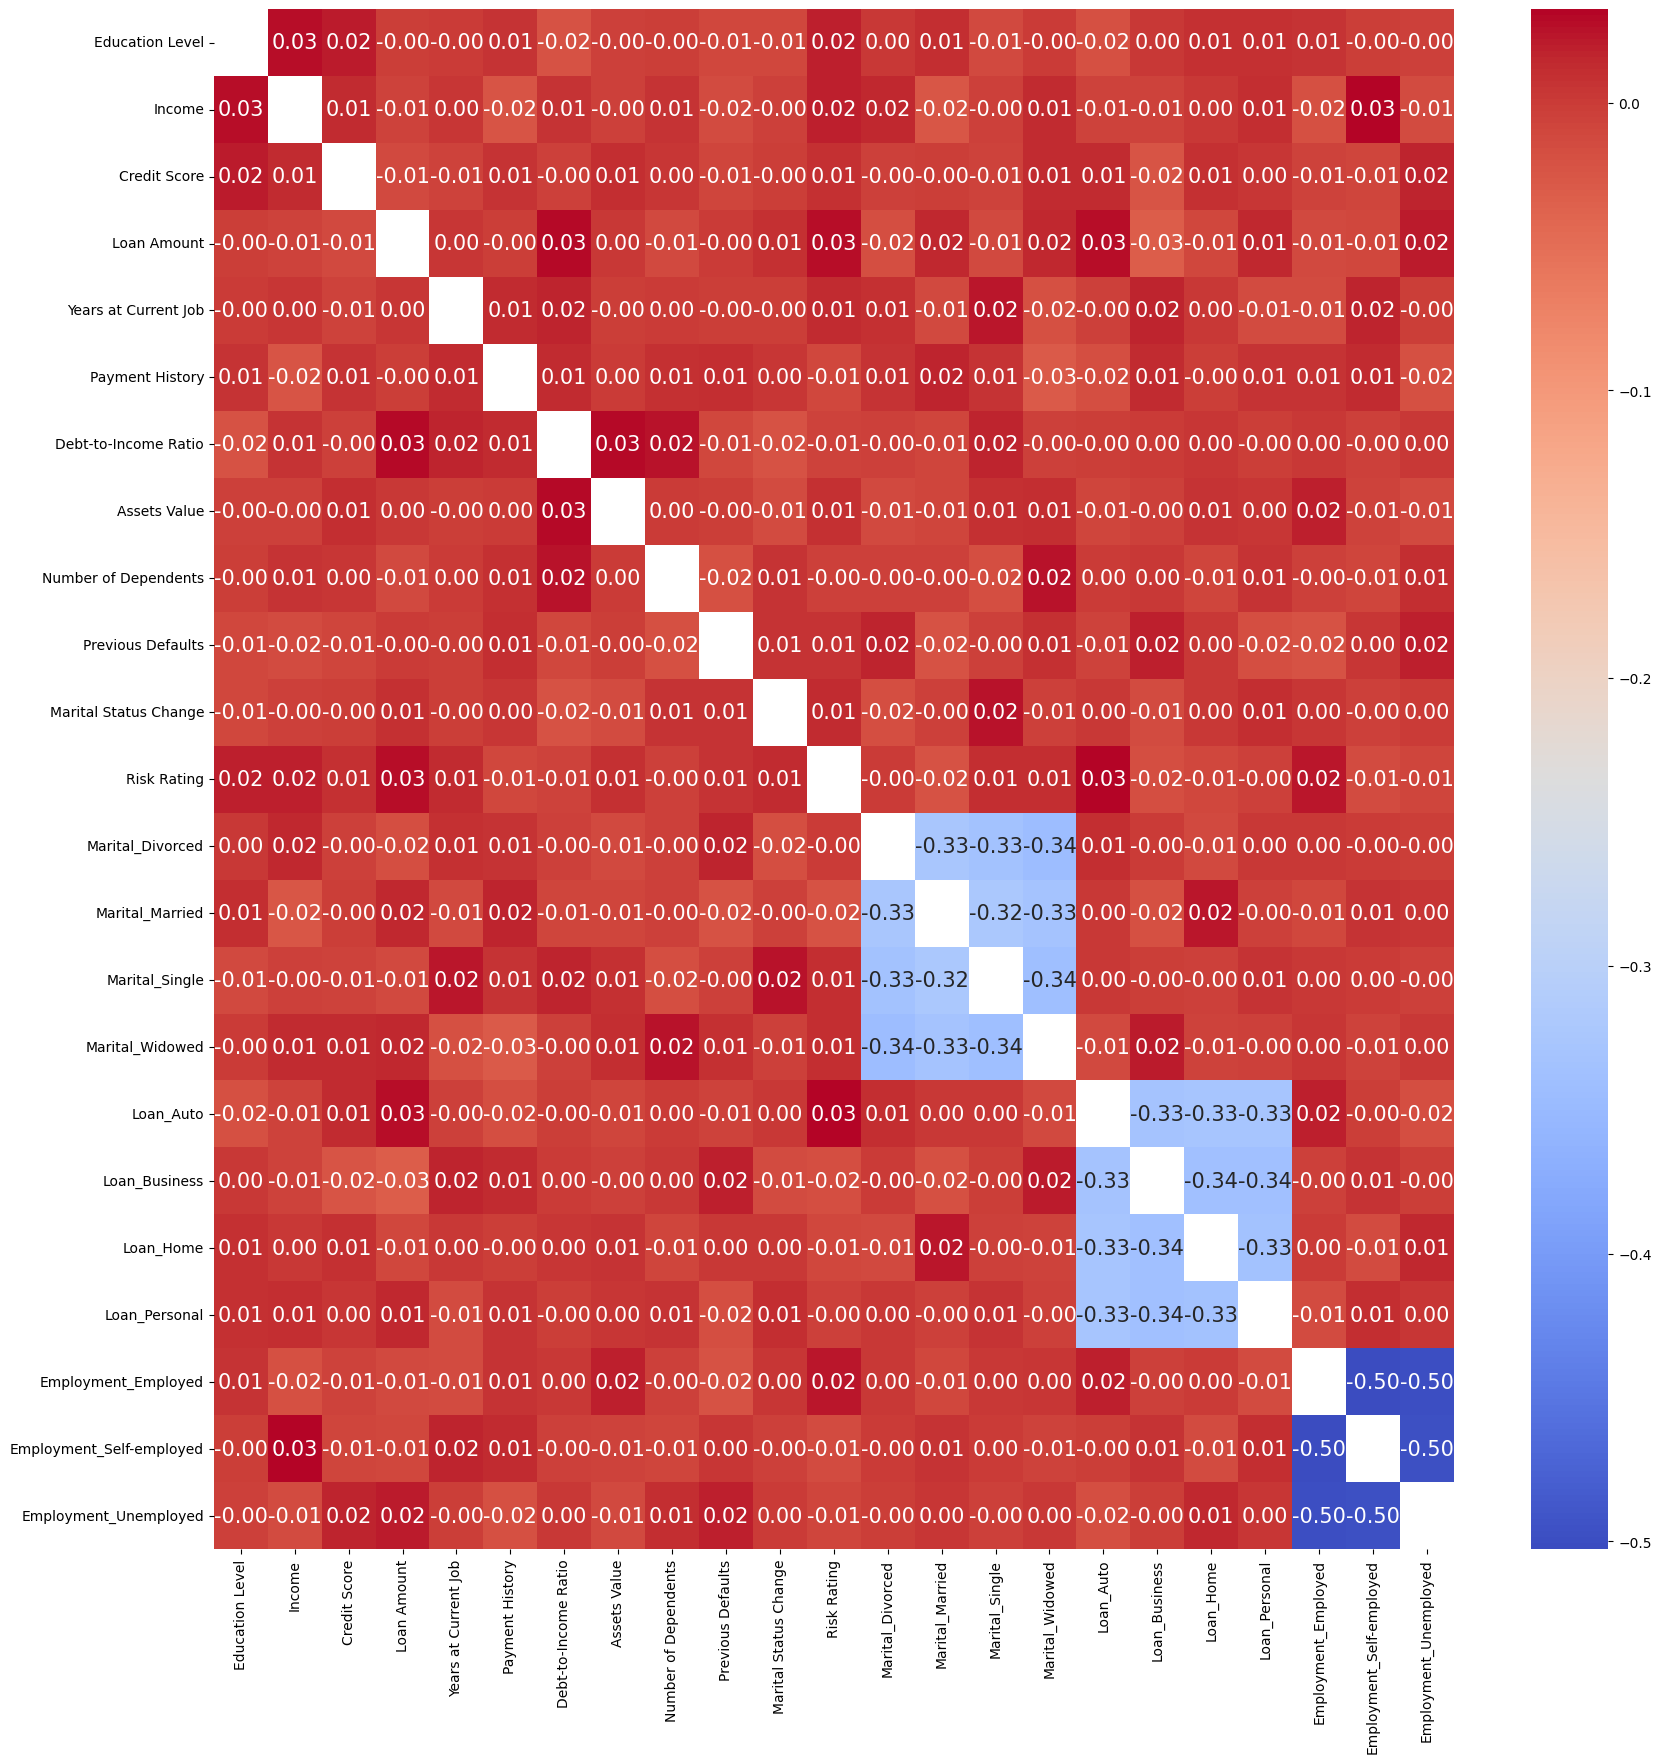

In [89]:
min_corr = 0
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(20, 20))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True), annot=True, fmt= '.2f',annot_kws={'size': 15})

**We can find actually every feature doesn't have too much correlations, so we can only delete income, credit score, lean amount years at current job, assets value, only leave their bins**

In [90]:
prediction_var = [col for col in df.columns if col != 'Risk Rating']

In [91]:
def set_dataset(feature_list, normalize=False):
    X = df[feature_list]
    y = df[['Risk Rating']]
    if normalize:
        X = (X - X.mean()) / X.std()
    print(f"X.shape: {X.shape}, y.shape: {y.shape}")
    return X, y
X, y = set_dataset(prediction_var, normalize=True)

X.shape: (6720, 22), y.shape: (6720, 1)


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(f"X_train.shape: {X.shape}, y_train.shape: {y_train.shape}")

X_train.shape: (6720, 22), y_train.shape: (4704, 1)


# Dimensionality Reduction and Visualization

**3D**

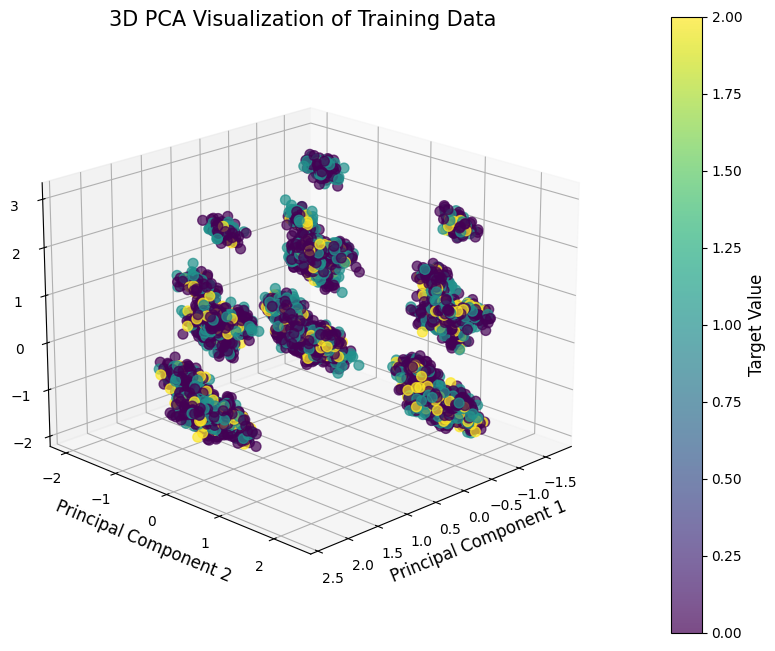

In [93]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming X_train and y_train are already defined
# X_train: Feature matrix for training
# y_train: Target variable for training

# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
result = pca.fit_transform(X_train)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing target values
scatter = ax.scatter(
    xs=result[:, 0],  # First principal component
    ys=result[:, 1],  # Second principal component
    zs=result[:, 2],  # Third principal component
    c=y_train,        # Color based on target variable
    cmap='viridis',   # Colormap
    s=50,             # Marker size
    alpha=0.7         # Transparency for better visualization
)

# Add colorbar to indicate mapping of target variable
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1, aspect=20)
colorbar.set_label('Target Value', fontsize=12)

# Set axis labels
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)

# Set plot title
ax.set_title('3D PCA Visualization of Training Data', fontsize=15)

# Rotate view for better visualization
ax.view_init(elev=20, azim=45)

# Show the plot
plt.show()



**2D**

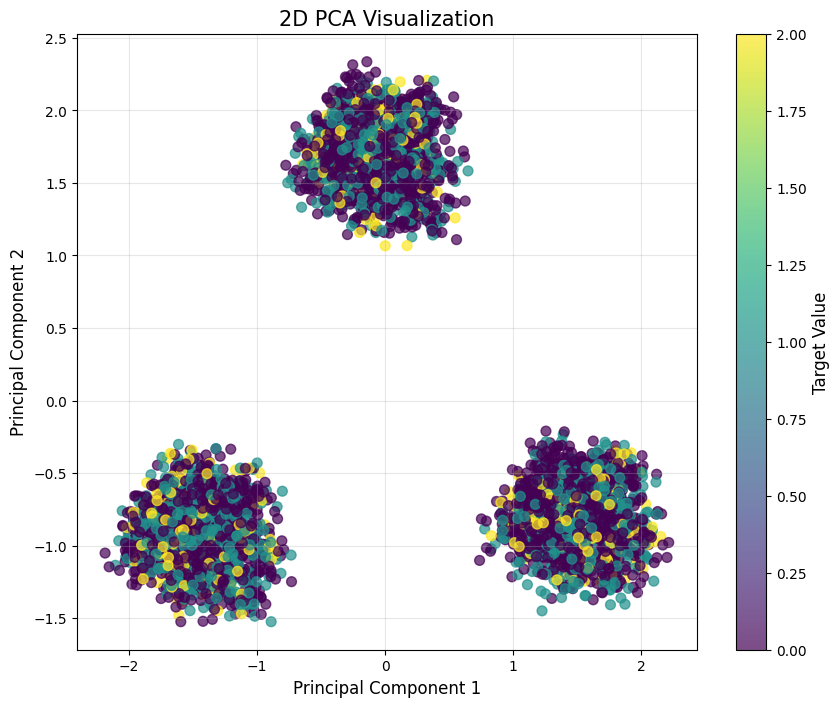

In [94]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 确保 y_train 是一维数组或 Pandas Series
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]  # 如果 y_train 是 DataFrame，转换为 Series

# 标准化特征矩阵
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 使用 PCA 将特征降到二维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# 可视化 2D PCA 结果
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_pca[:, 0],        # 第一主成分
    X_pca[:, 1],        # 第二主成分
    c=y_train,          # 确保 y_train 是一维数组或 Series
    cmap='viridis',     # 使用的颜色图
    s=50,               # 点大小
    alpha=0.7           # 透明度
)

# 添加颜色条
colorbar = plt.colorbar(scatter)
colorbar.set_label('Target Value', fontsize=12)

# 设置轴标签和标题
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.title('2D PCA Visualization', fontsize=15)

# 显示图形
plt.grid(alpha=0.3)
plt.show()


# Modeling

**Random** **Forest**

In [95]:
from sklearn.ensemble import RandomForestClassifier

def fit_forest(X_train, y_train, X_test, y_test):
    model=RandomForestClassifier(n_estimators=100, random_state=seed) # a simple random forest model
    model.fit(X_train, y_train) # now fit our model for training data
    y_pred = model.predict(X_test) # predict for the test data
    print(f"Accuracy: {metrics.accuracy_score(y_pred, y_test)}") # to check the accuracy
    featimp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    print("\nFeatures sorted by descending importance:")
    print(featimp) # this is the property of Random Forest classifier that it provide us the importance of the features used

fit_forest(X_train, y_train, X_test, y_test)

Accuracy: 0.5967261904761905

Features sorted by descending importance:
Debt-to-Income Ratio        0.152297
Previous Defaults           0.075525
Credit Score                0.069381
Loan Amount                 0.068757
Number of Dependents        0.068174
Years at Current Job        0.065017
Income                      0.064314
Assets Value                0.064002
Payment History             0.060511
Education Level             0.060482
Marital Status Change       0.045904
Marital_Single              0.020307
Marital_Widowed             0.020130
Marital_Divorced            0.019968
Marital_Married             0.018955
Loan_Personal               0.018898
Loan_Home                   0.018861
Employment_Unemployed       0.018196
Employment_Self-employed    0.017866
Loan_Business               0.017810
Employment_Employed         0.017366
Loan_Auto                   0.017276
dtype: float64


**KNN**

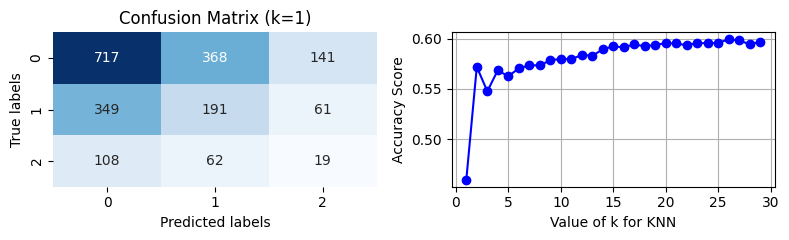

In [97]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# import matplotlib.pyplot as plt
# import seaborn as sns


from sklearn.metrics import confusion_matrix
def fit_knn(X_train, y_train, X_test, y_test):
    k_range = list(range(1, 30))
    scores = []
    conf_matrix = None
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
        if k == 1: conf_matrix = confusion_matrix(y_test, y_pred)
    fig, axes = plt.subplots(1, 2, figsize=(8, 2.5))
    if conf_matrix is not None:
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[0])
        axes[0].set_xlabel('Predicted labels')
        axes[0].set_ylabel('True labels')
        axes[0].set_title('Confusion Matrix (k=1)')
    axes[1].plot(k_range, scores, marker='o', linestyle='-', color='b')
    axes[1].set_xlabel('Value of k for KNN')
    axes[1].set_ylabel('Accuracy Score')
    axes[1].grid(True)
    fig.tight_layout()
    return y_pred
p = fit_knn(X_train, y_train, X_test, y_test)

# Cross-Validation and Hyperparameter Optimization:

In [98]:
from sklearn.model_selection import cross_val_score

def cv(model, X, y):
    scores = cross_val_score(model, X, y, cv=5)
    print("Scores: " + str(scores))
    print("%0.3f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cv(RandomForestClassifier(n_estimators=100, random_state=seed), X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Scores: [0.58482143 0.58854167 0.58407738 0.58779762 0.58035714]
0.585 accuracy with a standard deviation of 0.00


In [99]:
cv(KNeighborsClassifier(n_neighbors=10), X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Scores: [0.5610119  0.55431548 0.56770833 0.5610119  0.55729167]
0.560 accuracy with a standard deviation of 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [100]:
from sklearn.model_selection import GridSearchCV

def gridsearch_cv(model,param_grid, X_train, y_train):
    clf = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=2)
    clf.fit(X_train, y_train)
    print(f"The best score is {clf.best_score_}, with parameters {clf.best_params_}")
    return clf.best_estimator_

In [101]:
param_grid = {
    'n_neighbors': list(range(1, 30, 3)),
    'leaf_size': list(range(1, 30, 3))
}
gridsearch_cv(KNeighborsClassifier(), param_grid, X, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
The best score is 0.584672619047619, with parameters {'leaf_size': 1, 'n_neighbors': 25}


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(leaf_size=1, n_neighbors=25)

In [102]:
param_grid = {
    'n_estimators': [10, 50, 100],
    "random_state": [seed]
}
clf = gridsearch_cv(RandomForestClassifier(), param_grid, X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The best score is 0.5851190476190476, with parameters {'n_estimators': 100, 'random_state': 42}


# Feature Importance and Re-Visualization

In [71]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring="accuracy", min_features_to_select=1, n_jobs=2, verbose=1)
rfecv.fit(X, y)
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Feature ranking: {rfecv.ranking_}")
print(f"Selected features: {list(X.columns[rfecv.support_])}")

Fitting estimator with 22 features.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 21 features.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 20 features.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Fitting estimator with 19 features.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Optimal number of features: 18
Feature ranking: [1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 5 2 1 1 3 1 1]
Selected features: ['Education Level', 'Income', 'Credit Score', 'Loan Amount', 'Years at Current Job', 'Payment History', 'Debt-to-Income Ratio', 'Assets Value', 'Number of Dependents', 'Previous Defaults', 'Marital Status Change', 'Marital_Divorced', 'Marital_Single', 'Marital_Widowed', 'Loan_Home', 'Loan_Personal', 'Employment_Self-employed', 'Employment_Unemployed']


# AutoML

In [103]:
from flaml import AutoML

automl = AutoML()
def auto_ml(max_iter=300):
    automl = AutoML()
    settings = {
        "time_budget": 120,  # in seconds (-1 = unlimited)
        "max_iter": max_iter,  # maximum iterations of the search
        "metric": 'accuracy',
        "task": 'classification',
        "seed": seed
    }
    automl.fit(X_train=X_train, y_train=y_train, **settings)  # Search for the best model and hyperparameters
    y_pred = automl.predict(X_test)  # Make predictions on the test set
    return automl, y_pred

automl, y_pred = auto_ml(300)

[flaml.automl.logger: 01-06 10:57:11] {1728} INFO - task = classification
[flaml.automl.logger: 01-06 10:57:11] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 01-06 10:57:11] {1838} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 01-06 10:57:11] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'lrl1']
[flaml.automl.logger: 01-06 10:57:11] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 01-06 10:57:11] {2393} INFO - Estimated sufficient time budget=1775s. Estimated necessary time budget=41s.
[flaml.automl.logger: 01-06 10:57:11] {2442} INFO -  at 0.2s,	estimator lgbm's best error=0.4073,	best estimator lgbm's best error=0.4073
[flaml.automl.logger: 01-06 10:57:11] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 01-06 10:57:12] {2442} INFO -  at 0.4s,	estimator lgbm's best error=0.4073,	best estimator lgbm's best error=0.4073
[flaml.automl.logger: 01-06

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 01-06 10:57:13] {2442} INFO -  at 1.5s,	estimator sgd's best error=0.4073,	best estimator lgbm's best error=0.4073
[flaml.automl.logger: 01-06 10:57:13] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 01-06 10:57:13] {2442} INFO -  at 1.8s,	estimator lgbm's best error=0.4073,	best estimator lgbm's best error=0.4073
[flaml.automl.logger: 01-06 10:57:13] {2258} INFO - iteration 5, current learner xgboost
[flaml.automl.logger: 01-06 10:57:13] {2442} INFO -  at 2.0s,	estimator xgboost's best error=0.4075,	best estimator lgbm's best error=0.4073
[flaml.automl.logger: 01-06 10:57:13] {2258} INFO - iteration 6, current learner xgboost
[flaml.automl.logger: 01-06 10:57:13] {2442} INFO -  at 2.3s,	estimator xgboost's best error=0.4073,	best estimator lgbm's best error=0.4073
[flaml.automl.logger: 01-06 10:57:13] {2258} INFO - iteration 7, current learner lgbm
[flaml.automl.logger: 01-06 10:57:14] {2442} INFO -  at 2.4s,	estimator lgbm's best error=0.4

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 01-06 10:59:13] {2442} INFO -  at 121.7s,	estimator lrl1's best error=0.4073,	best estimator rf's best error=0.4065
[flaml.automl.logger: 01-06 10:59:13] {2685} INFO - retrain rf for 0.0s
[flaml.automl.logger: 01-06 10:59:13] {2688} INFO - retrained model: RandomForestClassifier(max_features=0.1, max_leaf_nodes=41, n_estimators=10,
                       n_jobs=-1, random_state=12032022)
[flaml.automl.logger: 01-06 10:59:13] {1985} INFO - fit succeeded
[flaml.automl.logger: 01-06 10:59:13] {1986} INFO - Time taken to find the best model: 105.49393033981323


In [ ]:
automl.model.estimator

ExtraTreesClassifier(criterion='entropy', max_features=0.2155167384207918,
                     max_leaf_nodes=16, n_estimators=4, n_jobs=-1,
                     random_state=12032022)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.6066468253968254